## Rancang Bangun Aplikasi Untuk Analisis Masa Studi Mahasiswa Menggunakan Algoritma ID3
<br>**Satya Kenandi (24010315140094)**</br>

In [1]:
# from IPython.display import Image
# Image("./Crisp-DM.png")

## 2. Data Understanding (CRISP-DM)

** 2.1 Collect Data **

Mencoba melihat data tabel wisudawan yang ada, dengan melihat salah satu data excelnya sebelum semua data tabel digabungkan menjadi satu

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import pickle
import warnings
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import savefig
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile


In [4]:
#import seluruh file excel
import os
data_awal = []
files = ['C:\\Users\\USER\\Documents\\SEMESTER 7\\DATMIN\\PRAK DATMIN\\TUBES\\wisuda 2012 anonim\\127 juli 2012.xls', 
         'C:\\Users\\USER\\Documents\\SEMESTER 7\\DATMIN\\PRAK DATMIN\\TUBES\\wisuda 2012 anonim\\128 okt 2012.xls',
         'C:\\Users\\USER\\Documents\\SEMESTER 7\\DATMIN\\PRAK DATMIN\\TUBES\\wisuda 2013-2014 anonim\\129 januari 2013.xls',
         'C:\\Users\\USER\\Documents\\SEMESTER 7\\DATMIN\\PRAK DATMIN\\TUBES\\wisuda 2013-2014 anonim\\130 april 2013.xls',
         'C:\\Users\\USER\\Documents\\SEMESTER 7\\DATMIN\\PRAK DATMIN\\TUBES\\wisuda 2013-2014 anonim\\131 juli 2013.xls',
         'C:\\Users\\USER\\Documents\\SEMESTER 7\\DATMIN\\PRAK DATMIN\\TUBES\\wisuda 2013-2014 anonim\\132 okt 2013.xls',
         'C:\\Users\\USER\\Documents\\SEMESTER 7\\DATMIN\\PRAK DATMIN\\TUBES\\wisuda 2013-2014 anonim\\133 januari 2014.xls',
         'C:\\Users\\USER\\Documents\\SEMESTER 7\\DATMIN\\PRAK DATMIN\\TUBES\\wisuda 2013-2014 anonim\\134 april 2014.xls',
         'C:\\Users\\USER\\Documents\\SEMESTER 7\\DATMIN\\PRAK DATMIN\\TUBES\\wisuda 2013-2014 anonim\\135 juli 2014.xls',
         'C:\\Users\\USER\\Documents\\SEMESTER 7\\DATMIN\\PRAK DATMIN\\TUBES\\wisuda 2013-2014 anonim\\136 okt 2014.xls',
         'C:\\Users\\USER\\Documents\\SEMESTER 7\\DATMIN\\PRAK DATMIN\\TUBES\\wisuda 2014-2017 anonim\\137 jan 2015.xls',
         'C:\\Users\\USER\\Documents\\SEMESTER 7\\DATMIN\\PRAK DATMIN\\TUBES\\wisuda 2014-2017 anonim\\138 april 2015.xls',
         'C:\\Users\\USER\\Documents\\SEMESTER 7\\DATMIN\\PRAK DATMIN\\TUBES\\wisuda 2014-2017 anonim\\139 juli 2015.xls',
         'C:\\Users\\USER\\Documents\\SEMESTER 7\\DATMIN\\PRAK DATMIN\\TUBES\\wisuda 2014-2017 anonim\\140 okt 2015.xls',
         'C:\\Users\\USER\\Documents\\SEMESTER 7\\DATMIN\\PRAK DATMIN\\TUBES\\wisuda 2014-2017 anonim\\141 jan 2016.xls',
         'C:\\Users\\USER\\Documents\\SEMESTER 7\\DATMIN\\PRAK DATMIN\\TUBES\\wisuda 2014-2017 anonim\\142 april 2016.xls',
         'C:\\Users\\USER\\Documents\\SEMESTER 7\\DATMIN\\PRAK DATMIN\\TUBES\\wisuda 2014-2017 anonim\\143 juli 2016.xls',
         'C:\\Users\\USER\\Documents\\SEMESTER 7\\DATMIN\\PRAK DATMIN\\TUBES\\wisuda 2014-2017 anonim\\144 okt 2016.xls',
         'C:\\Users\\USER\\Documents\\SEMESTER 7\\DATMIN\\PRAK DATMIN\\TUBES\\wisuda 2014-2017 anonim\\145 jan 2017.xls',
         'C:\\Users\\USER\\Documents\\SEMESTER 7\\DATMIN\\PRAK DATMIN\\TUBES\\wisuda 2014-2017 anonim\\146 april 2017.xls',
         'C:\\Users\\USER\\Documents\\SEMESTER 7\\DATMIN\\PRAK DATMIN\\TUBES\\wisuda 2014-2017 anonim\\147 juli 2017.xls',
        ]
for f in files:
    data_awal.append(pd.read_excel(f))

data_baru = pd.concat([d for d in data_awal])

** 2.2 Explore Data **
- Untuk mendapatkan pemahaman awal mengenai data wisudawan

In [5]:
# data_baru.to_csv('datadikit.csv', header=True, index=False)

In [5]:
data_baru.head(10)

,nimhstrlsm,nmmhstrlsm,tplhrtrlsm,tglhrtrlsm,straamsjen,nmpstmspst,llsketrlsm,nlipktrlsm,tgllstrlsm,tgmsktrlsm,...,nmtgamsjen,kdjenmsjen,nmjenmsjen,gelarmspst,kursitrlsm,pemb1trlsm,pemb2trlsm,kdpsttrlsm,kdpstmspst,jalur
0,J2A007007,anonim,Jepara,1990-05-04 00:00:00,S1,Matematika,4353,3.13,2012-06-20,2007-09-01,...,Judul Skripsi,2,Sarjana,SARJANA SAINS (S.Si.),NaN,"Drs. YD Sumanto, M.Si","Suryoto, M.Si",J2A,J2A,0
1,J2A008064,anonim,Grobogan,1990-07-25 00:00:00,S1,Matematika,4354,3.03,2012-06-22,2008-09-01,...,Judul Skripsi,2,Sarjana,SARJANA SAINS (S.Si.),NaN,"Drs. Y.D Sumanto, M.Si","Suryoto, M.Si",J2A,J2A,0
2,J2A008063,anonim,Semarang,1990-03-06 00:00:00,S1,Matematika,4355,3.13,2012-06-14,2008-09-01,...,Judul Skripsi,2,Sarjana,SARJANA SAINS (S.Si.),NaN,"Suryoto, M.Si","Drs. YD Sumanto, M.Si",J2A,J2A,0
3,J2A008036,anonim,Pati,1991-03-15 00:00:00,S1,Matematika,4356,3.56,2012-06-05,2008-09-01,...,Judul Skripsi,2,Sarjana,SARJANA SAINS (S.Si.),NaN,"Siti Khabibah,M.Sc","Robertus Heri S. U, MSi",J2A,J2A,0
4,J2A008012,anonim,Demak,1990-04-12 00:00:00,S1,Matematika,4357,3.26,2012-06-18,2008-09-01,...,Judul Skripsi,2,Sarjana,SARJANA SAINS (S.Si.),NaN,"Drs. Djuwandi, SU","R. Heri Soelistyo U, M.Si",J2A,J2A,0
5,J2A007021,anonim,Kuningan,1989-09-18 00:00:00,S1,Matematika,4358,2.84,2012-04-13,2007-09-01,...,Judul Skripsi,2,Sarjana,SARJANA SAINS (S.Si.),NaN,"Drs. Djuwandi, SU","Dr. Widowati, M.Si",J2A,J2A,0
6,J2A008056,anonim,Pekalongan,1990-05-19 00:00:00,S1,Matematika,4359,3.63,2012-06-13,2008-09-01,...,Judul Skripsi,2,Sarjana,SARJANA SAINS (S.Si.),NaN,"Dr. Widowati, M.Si","Drs. Kartono, M.Si",J2A,J2A,0
7,J2A008055,anonim,Kudus,1989-07-17 00:00:00,S1,Matematika,4360,3.69,2012-06-15,2008-09-01,...,Judul Skripsi,2,Sarjana,SARJANA SAINS (S.Si.),NaN,"Dr. Widowati, M.Si","Drs. Kartono, M.Si",J2A,J2A,0
8,J2A008050,anonim,Pekalongan,1990-06-15 00:00:00,S1,Matematika,4361,3.63,2012-05-04,2008-09-01,...,Judul Skripsi,2,Sarjana,SARJANA SAINS (S.Si.),NaN,"Dr. Widowati, M.Si","Drs. Kartono, M.Si",J2A,J2A,0
9,J2A008023,anonim,Kab. Semarang,2012-05-11 00:00:00,S1,Matematika,4362,3.35,2012-06-18,2008-09-01,...,Judul Skripsi,2,Sarjana,SARJANA SAINS (S.Si.),NaN,"R. Heri Soelistyo Utomo, M.Si","Lucia Ratnasari, M.Si",J2A,J2A,0


In [6]:
data_baru['thstdtrlsm'].value_counts()

4    1237
3     828
5     254
6     188
2      91
1      81
7      59
0       1
Name: thstdtrlsm, dtype: int64

Pada atribut jurusan masih terdapat jurusan selain strata S1 yaitu Instrumentasi dan Elektronika

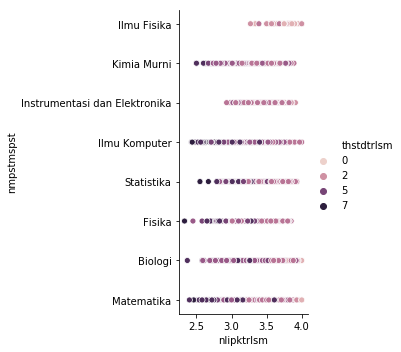

In [6]:
# persebaran jurusan
sns.relplot(x="nlipktrlsm", y="nmpstmspst", hue="thstdtrlsm", data=data_baru)

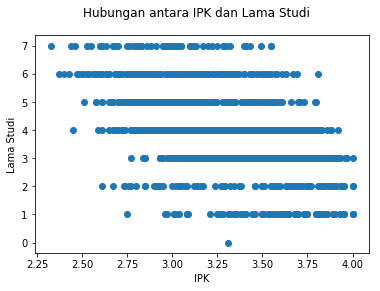

In [7]:
# meneliti hubungan antara nilai TOEFL dengan Tahun Lulus
plt.scatter(data_baru['nlipktrlsm'], data_baru['thstdtrlsm'])
plt.suptitle('Hubungan antara IPK dan Lama Studi')
plt.xlabel('IPK')
plt.ylabel('Lama Studi')
# plt.savefig('lamastudi.png')
plt.show()

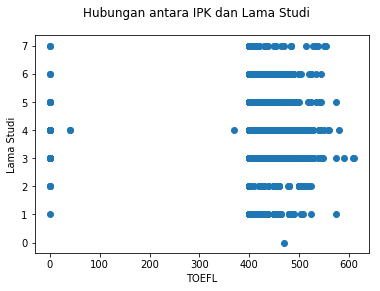

In [8]:
# meneliti hubungan antara nilai TOEFL dengan Tahun Lulus
plt.scatter(data_baru['toefltrlsm'], data_baru['thstdtrlsm'])
plt.suptitle('Hubungan antara IPK dan Lama Studi')
plt.xlabel('TOEFL')
plt.ylabel('Lama Studi')
plt.show()

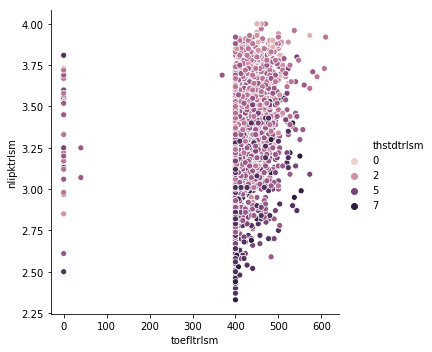

In [9]:
# persebaran nilai TOEFL
x = sns.relplot(x="toefltrlsm", y="nlipktrlsm", hue="thstdtrlsm", data=data_baru);
# y = x.savefig("grafik.png")

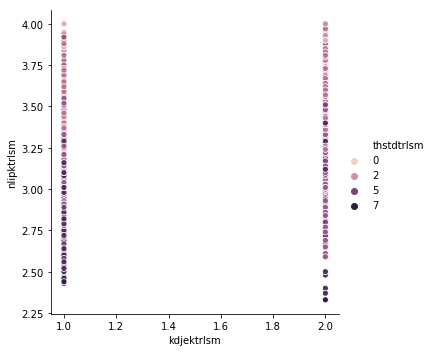

In [10]:
# persebaran jenis kelamin
sns.relplot(x="kdjektrlsm", y="nlipktrlsm", hue="thstdtrlsm", data=data_baru);

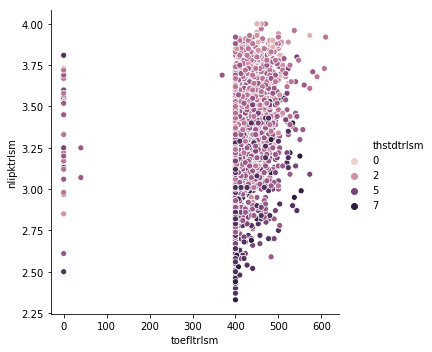

In [11]:
# persebaran masa studi
sns.relplot(x="toefltrlsm", y="nlipktrlsm", hue="thstdtrlsm", data=data_baru);

In [12]:
#menyimpan dalam file excel
# writer = pd.ExcelWriter('DataBaru.xlsx')
# data_baru.to_excel(writer, 'Sheet1', index=False)
# writer.save()

In [13]:
data_baru.describe()

,llsketrlsm,nlipktrlsm,thstdtrlsm,blstdtrlsm,hrstdtrlsm,toefltrlsm,noijftrlsm,stwsdtrlsm,noijutrlsm,jcutitrlsm,tahuntrlsm,preditrlsm,kdjektrlsm,nipnsmsfak,nipn1msfak,kdjenmsjen,kursitrlsm,jalur
count,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,0.0,2739.000000,0.0,2739.000000,2202.000000,2739.000000,2739.000000,2.739000e+03,2.739000e+03,2739.000000,1749.000000,2739.000000
mean,5720.010588,3.305528,3.835706,5.909456,14.784228,420.089084,NaN,0.136181,NaN,0.000365,2010.630336,3.496897,1.588171,1.969021e+17,1.963111e+17,1.993428,145.072041,1.469149
std,787.825327,0.296799,1.114364,3.938977,9.669851,58.761680,NaN,0.343043,NaN,0.019108,1.587247,0.867968,0.492254,8.929630e+03,7.137303e+03,0.541850,262.544490,1.513772
min,4353.000000,2.330000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,2005.000000,2.000000,1.000000,1.969021e+17,1.963111e+17,0.000000,0.000000,0.000000
25%,5035.500000,3.090000,3.000000,3.000000,5.000000,400.000000,NaN,0.000000,NaN,0.000000,2010.000000,2.000000,1.000000,1.969021e+17,1.963111e+17,2.000000,37.000000,0.000000
50%,5725.000000,3.310000,4.000000,6.000000,16.000000,413.000000,NaN,0.000000,NaN,0.000000,2011.000000,4.000000,2.000000,1.969021e+17,1.963111e+17,2.000000,74.000000,1.000000
75%,6400.500000,3.530000,4.000000,9.000000,23.000000,443.000000,NaN,0.000000,NaN,0.000000,2012.000000,4.000000,2.000000,1.969021e+17,1.963111e+17,2.000000,113.000000,3.000000
max,7085.000000,4.000000,7.000000,12.000000,30.000000,610.000000,NaN,1.000000,NaN,1.000000,2031.000000,4.000000,2.000000,1.969021e+17,1.963111e+17,4.000000,1128.000000,6.000000


In [14]:
data_baru.isnull().sum()

nimhstrlsm       0
nmmhstrlsm       0
tplhrtrlsm       0
tglhrtrlsm       0
straamsjen       0
nmpstmspst       0
llsketrlsm       0
nlipktrlsm       0
tgllstrlsm       0
tgmsktrlsm       0
thstdtrlsm       0
blstdtrlsm       0
hrstdtrlsm       0
toefltrlsm       0
noijftrlsm    2739
stwsdtrlsm       0
noijutrlsm    2739
alamtrlsm        1
noteltrlsm    2735
nohpetrlsm       9
nmorttrlsm       3
skriptrlsm       1
phototrlsm       0
jcutitrlsm       0
tgijatrlsm       0
tahuntrlsm     537
preditrlsm       0
skrettrlsm    2738
tgrettrlsm       0
kdjektrlsm       0
dekanmsfak       0
nipnsmsfak       0
nmfakmsfak       0
kdfakmsfak       0
pdek1msfak       0
nipn1msfak       0
nmtgamsjen       0
kdjenmsjen       0
nmjenmsjen       0
gelarmspst       0
kursitrlsm     990
pemb1trlsm       4
pemb2trlsm     627
kdpsttrlsm       0
kdpstmspst       0
jalur            0
dtype: int64

Setelah menggabungkan semua data excel, kemudian data excel yang telah tergabung dilihat apakah terdapat missing value atau tidak di dalam kolomnya dari total 2739 data. 
Hasil sementara kolom yang terdapat missing value :
- noijftrlsm : 2739 data
- alamtrlsm  : 1 data
- telf rumah : 2735 data
- nomor hp   : 9 data
- nama ortu  : 3 data
- tahuntrlsm : 537 data
- skrektor   : 2738 data
- kursitrlsm : 990 data
- pemb 1 tr  : 4 data
- pemb 2 t   : 627 data

## 3. Data Preparation (CRISP-DM)

Pada tahapan persiapan data mencakup semua kegiatan yang membangun dataset akhir (data yang akan dimasukan ke dalam pemodelan) dari data mentah awal.  

** 3.1 Clean Data **
- Pada proses Clean Data dilakukan dalam penanganan menghilangkan data kolom yang tidak digunakan ataupun memfilter data yang ada untuk diolah. Sehingga hanya menghasilkan 6 atribut yaitu strata, jurusan, IPK, jenis kelamin, TOEFL, dan asal serta 1 kelas yaitu lama studi. Dan menghilangkan data wisudawan selain strata S1

In [15]:
data_baru = data_baru.drop(["nimhstrlsm", "nmmhstrlsm", "tplhrtrlsm"
                            , "tglhrtrlsm"
                            , "llsketrlsm", "hrstdtrlsm"
                            , "tgllstrlsm", "tgmsktrlsm"
                            , "noijftrlsm", "stwsdtrlsm", "noijutrlsm"
                            , "noteltrlsm", "nohpetrlsm"
                            , "nmorttrlsm", "skriptrlsm", "phototrlsm"
                            , "jcutitrlsm", "tgijatrlsm", "tahuntrlsm"
                            , "preditrlsm", "skrettrlsm","tgrettrlsm"
                            , "dekanmsfak", "nipnsmsfak"
                            , "nmfakmsfak", "kdfakmsfak", "pdek1msfak"
                            , "nipn1msfak", "nmtgamsjen", "kdjenmsjen"
                            , "nmjenmsjen", "gelarmspst", "kursitrlsm"
                            , "pemb1trlsm", "pemb2trlsm", "kdpsttrlsm"
                            , "kdpstmspst","jalur"], axis=1)

In [16]:
## membuang strata selain S1
data_baru=data_baru[data_baru['straamsjen'] == "S1"]
data_baru

,straamsjen,nmpstmspst,nlipktrlsm,thstdtrlsm,blstdtrlsm,toefltrlsm,alamtrlsm,kdjektrlsm
0,S1,Matematika,3.13,4,9,427,Jalan Kembangarum RT 6 RW II Kecamatan Mrangge...,1
1,S1,Matematika,3.03,3,9,403,Ds. tegalrejo RT 01/ III Kec. Wirosari Kab. Gr...,2
2,S1,Matematika,3.13,3,9,400,Jalan Karang Kimpul Selatan I RT 02 RW 01 No. ...,2
3,S1,Matematika,3.56,3,9,433,Ds. Semirejo RT 03 RW VIII Kec. Gembong Kab. Pati,2
4,S1,Matematika,3.26,3,9,400,Ds. Bumirejo RT 06/01 Kec. Karangawen demak 59566,1
5,S1,Matematika,2.84,4,7,417,Jl. Siliwangi No. 118 Desa Ciawigebang Kec. Ci...,1
6,S1,Matematika,3.63,3,9,400,Perumahan Buaran Indah B 191 RT 04/ 06 Pekalon...,2
7,S1,Matematika,3.69,3,9,427,Jati Kulon Gg. 1 RT 07/1 No. 49 Kudus,2
8,S1,Matematika,3.63,3,8,413,Jalan Cendrawasih Gg. Kurma RT 08/2 No. 299 Wi...,2
9,S1,Matematika,3.35,3,9,417,Dsn Rowopolo RT 01/ 03 Ds Rowosari Kec. Tuntan...,2


** 3.2 Construct Data **

Membangun data agar data wisudawan yang dibuat dapat menghasilkan model yang sesuai dengan tujuan untuk menentukan faktor lulus tepat waktu/tidak tepat waktu. Tahapan yang dilakukan antara lain : merubah nama atribut, penggabungan atribut, substitusi nilai data, transformasi nilai data

In [17]:
data_baru.rename(index=str, columns={"straamsjen":"strata", "nmpstmspst":"jurusan", "nlipktrlsm":"ipk"
                                     , "toefltrlsm":"toefl", "kdjektrlsm":"jenis kelamin", "thstdtrlsm":"lama studi(tahun)"
                                     , "blstdtrlsm":"lama studi(bulan)", "alamtrlsm":"alamat"}, inplace=True)
data_baru.describe()

,ipk,lama studi(tahun),lama studi(bulan),toefl,jenis kelamin
count,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000
mean,3.284208,3.948779,5.890071,421.362884,1.603625
std,0.289939,1.048553,3.938147,49.730217,0.489240
min,2.330000,0.000000,0.000000,0.000000,1.000000
25%,3.070000,3.000000,3.000000,400.000000,1.000000
50%,3.290000,4.000000,6.000000,413.000000,2.000000
75%,3.510000,4.000000,9.000000,440.000000,2.000000
max,4.000000,7.000000,12.000000,610.000000,2.000000


In [18]:
data_pre = data_baru[['strata', 'jurusan', 'jenis kelamin', 'ipk', 
                      'toefl', 'alamat', 'lama studi(tahun)', 'lama studi(bulan)']]

In [19]:
data_pre.describe()

,jenis kelamin,ipk,toefl,lama studi(tahun),lama studi(bulan)
count,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000
mean,1.603625,3.284208,421.362884,3.948779,5.890071
std,0.489240,0.289939,49.730217,1.048553,3.938147
min,1.000000,2.330000,0.000000,0.000000,0.000000
25%,1.000000,3.070000,400.000000,3.000000,3.000000
50%,2.000000,3.290000,413.000000,4.000000,6.000000
75%,2.000000,3.510000,440.000000,4.000000,9.000000
max,2.000000,4.000000,610.000000,7.000000,12.000000


In [20]:
# #menyimpan dalam file excel
# writer = pd.ExcelWriter('DataWisudawan.xlsx')
# data_baru.to_excel(writer, 'Sheet1', index=False)
# writer.save()

Melihat apakah data wisudawan sudah benar menghilangkan data wisudawan selain S1

In [21]:
data_pre['strata'].value_counts()

S1    2538
Name: strata, dtype: int64

In [22]:
## Mengekstrak tanggal masuk untuk mengetahui angkatan
# data_pre['tahun masuk'] = pd.DatetimeIndex(data_pre['tgl masuk']).year
# data_pre.head(10)

Menggabungkan atribut lama studi(tahun) dengan atribut lama studi(bulan) untuk mengetahui total masa studi

In [23]:
data_pre['lama studi(tahun)'].value_counts()

4    1218
3     743
5     254
6     188
7      59
1      40
2      35
0       1
Name: lama studi(tahun), dtype: int64

In [24]:
data_pre['studi'] = (data_pre['lama studi(bulan)']/12)+data_pre['lama studi(tahun)']

In [25]:
data_pre.head()

,strata,jurusan,jenis kelamin,ipk,toefl,alamat,lama studi(tahun),lama studi(bulan),studi
0,S1,Matematika,1,3.13,427,Jalan Kembangarum RT 6 RW II Kecamatan Mrangge...,4,9,4.75
1,S1,Matematika,2,3.03,403,Ds. tegalrejo RT 01/ III Kec. Wirosari Kab. Gr...,3,9,3.75
2,S1,Matematika,2,3.13,400,Jalan Karang Kimpul Selatan I RT 02 RW 01 No. ...,3,9,3.75
3,S1,Matematika,2,3.56,433,Ds. Semirejo RT 03 RW VIII Kec. Gembong Kab. Pati,3,9,3.75
4,S1,Matematika,1,3.26,400,Ds. Bumirejo RT 06/01 Kec. Karangawen demak 59566,3,9,3.75


In [26]:
data_pre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2538 entries, 0 to 136
Data columns (total 9 columns):
strata               2538 non-null object
jurusan              2538 non-null object
jenis kelamin        2538 non-null int64
ipk                  2538 non-null float64
toefl                2538 non-null int64
alamat               2538 non-null object
lama studi(tahun)    2538 non-null int64
lama studi(bulan)    2538 non-null int64
studi                2538 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 198.3+ KB


Masih terdapat nilai TOEFL <= 400, sehingga harus dilakukan substitusi nilai

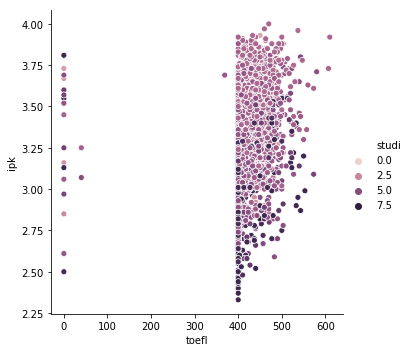

In [27]:
sns.relplot(x="toefl", y="ipk", hue="studi", data=data_pre);

Melihat kolom data yang tidak mempunyai nilai 0, dan yang mempunya nilai 0 adalah kolom :
- IPK
- TOEFL

Sehingga nilai 0 tersebut harus direplace untuk meningkatkan akurasi 

In [28]:
data_pre.loc[:, data_pre.all()]

,strata,jurusan,jenis kelamin,ipk,alamat
0,S1,Matematika,1,3.13,Jalan Kembangarum RT 6 RW II Kecamatan Mrangge...
1,S1,Matematika,2,3.03,Ds. tegalrejo RT 01/ III Kec. Wirosari Kab. Gr...
2,S1,Matematika,2,3.13,Jalan Karang Kimpul Selatan I RT 02 RW 01 No. ...
3,S1,Matematika,2,3.56,Ds. Semirejo RT 03 RW VIII Kec. Gembong Kab. Pati
4,S1,Matematika,1,3.26,Ds. Bumirejo RT 06/01 Kec. Karangawen demak 59566
5,S1,Matematika,1,2.84,Jl. Siliwangi No. 118 Desa Ciawigebang Kec. Ci...
6,S1,Matematika,2,3.63,Perumahan Buaran Indah B 191 RT 04/ 06 Pekalon...
7,S1,Matematika,2,3.69,Jati Kulon Gg. 1 RT 07/1 No. 49 Kudus
8,S1,Matematika,2,3.63,Jalan Cendrawasih Gg. Kurma RT 08/2 No. 299 Wi...
9,S1,Matematika,2,3.35,Dsn Rowopolo RT 01/ 03 Ds Rowosari Kec. Tuntan...


In [29]:
for i in range(data_pre.shape[0]):
    if data_pre['toefl'].iloc[i] < 400:
        print(data_pre['toefl'].iloc[i])

40
0
0
0
0
0
0
0
0
0
0
0
369
0
0
0
0
40
0
0
0
0
0


In [30]:
data_pre.isnull().sum()

strata               0
jurusan              0
jenis kelamin        0
ipk                  0
toefl                0
alamat               0
lama studi(tahun)    0
lama studi(bulan)    0
studi                0
dtype: int64

In [31]:
data_pre.mean()

jenis kelamin          1.603625
ipk                    3.284208
toefl                421.362884
lama studi(tahun)      3.948779
lama studi(bulan)      5.890071
studi                  4.439618
dtype: float64

Mengubah nilai 0 menjadi missing value untuk memudahkan dalam manipulasi nilai data

In [32]:
data_tes = data_pre.replace([0],np.NaN)
data_tes.head()

,strata,jurusan,jenis kelamin,ipk,toefl,alamat,lama studi(tahun),lama studi(bulan),studi
0,S1,Matematika,1,3.13,427.0,Jalan Kembangarum RT 6 RW II Kecamatan Mrangge...,4.0,9.0,4.75
1,S1,Matematika,2,3.03,403.0,Ds. tegalrejo RT 01/ III Kec. Wirosari Kab. Gr...,3.0,9.0,3.75
2,S1,Matematika,2,3.13,400.0,Jalan Karang Kimpul Selatan I RT 02 RW 01 No. ...,3.0,9.0,3.75
3,S1,Matematika,2,3.56,433.0,Ds. Semirejo RT 03 RW VIII Kec. Gembong Kab. Pati,3.0,9.0,3.75
4,S1,Matematika,1,3.26,400.0,Ds. Bumirejo RT 06/01 Kec. Karangawen demak 59566,3.0,9.0,3.75


In [33]:
data_tes.mean()

jenis kelamin          1.603625
ipk                    3.284208
toefl                424.709690
lama studi(tahun)      3.950335
lama studi(bulan)      6.975735
studi                  4.441368
dtype: float64

Berikut adalah jumlah data yang mempunyai nilai 0
- TOEFL : 20 data
- Studi : 1 data

In [34]:
data_tes.isnull().sum()

strata                 0
jurusan                0
jenis kelamin          0
ipk                    0
toefl                 20
alamat                 0
lama studi(tahun)      1
lama studi(bulan)    395
studi                  1
dtype: int64

Mengisi nilai missing value dengan nilai rata-rata pada atribut TOEFL dan kelas studi

In [35]:
data_tes['toefl'] = data_tes['toefl'].fillna(data_tes['toefl'].mean())
data_tes['studi'] = data_tes['studi'].fillna(data_tes['studi'].mean())

In [36]:
data_tes.loc[:, data_tes.all()]

,strata,jurusan,jenis kelamin,ipk,toefl,alamat,lama studi(tahun),lama studi(bulan),studi
0,S1,Matematika,1,3.13,427.0,Jalan Kembangarum RT 6 RW II Kecamatan Mrangge...,4.0,9.0,4.750000
1,S1,Matematika,2,3.03,403.0,Ds. tegalrejo RT 01/ III Kec. Wirosari Kab. Gr...,3.0,9.0,3.750000
2,S1,Matematika,2,3.13,400.0,Jalan Karang Kimpul Selatan I RT 02 RW 01 No. ...,3.0,9.0,3.750000
3,S1,Matematika,2,3.56,433.0,Ds. Semirejo RT 03 RW VIII Kec. Gembong Kab. Pati,3.0,9.0,3.750000
4,S1,Matematika,1,3.26,400.0,Ds. Bumirejo RT 06/01 Kec. Karangawen demak 59566,3.0,9.0,3.750000
5,S1,Matematika,1,2.84,417.0,Jl. Siliwangi No. 118 Desa Ciawigebang Kec. Ci...,4.0,7.0,4.583333
6,S1,Matematika,2,3.63,400.0,Perumahan Buaran Indah B 191 RT 04/ 06 Pekalon...,3.0,9.0,3.750000
7,S1,Matematika,2,3.69,427.0,Jati Kulon Gg. 1 RT 07/1 No. 49 Kudus,3.0,9.0,3.750000
8,S1,Matematika,2,3.63,413.0,Jalan Cendrawasih Gg. Kurma RT 08/2 No. 299 Wi...,3.0,8.0,3.666667
9,S1,Matematika,2,3.35,417.0,Dsn Rowopolo RT 01/ 03 Ds Rowosari Kec. Tuntan...,3.0,9.0,3.750000


Mengecek apakah nilai 0 yang berupa missing value sudah berubah dengan menggunakan nilai rata-rata kolom data yang sesuai

In [37]:
data_tes.isnull().sum()

strata                 0
jurusan                0
jenis kelamin          0
ipk                    0
toefl                  0
alamat                 0
lama studi(tahun)      1
lama studi(bulan)    395
studi                  0
dtype: int64

Setelah melakukan analisis terhadap nilai data berupa 0, ternyata masih terdapat data yang tidak sesuai dengan ukuran nilai minimal dari kolom datanya
- TOEFL minimal 400
- Studi minimal 3.5 tahun

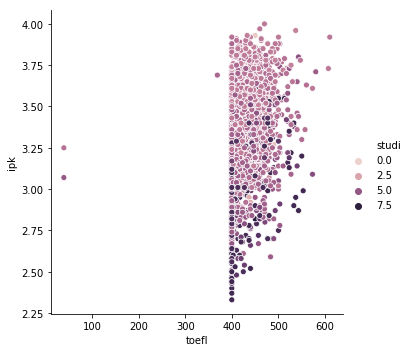

In [38]:
sns.relplot(x="toefl", y="ipk", hue="studi", data=data_tes);

In [39]:
data_tes.studi.min()

1.25

Masih terdapat nilai 40 pada toefl, yang seharusnya toefl minimal 400

In [40]:
data_v = data_tes.replace(40,np.NaN)
data_v

,strata,jurusan,jenis kelamin,ipk,toefl,alamat,lama studi(tahun),lama studi(bulan),studi
0,S1,Matematika,1,3.13,427.0,Jalan Kembangarum RT 6 RW II Kecamatan Mrangge...,4.0,9.0,4.750000
1,S1,Matematika,2,3.03,403.0,Ds. tegalrejo RT 01/ III Kec. Wirosari Kab. Gr...,3.0,9.0,3.750000
2,S1,Matematika,2,3.13,400.0,Jalan Karang Kimpul Selatan I RT 02 RW 01 No. ...,3.0,9.0,3.750000
3,S1,Matematika,2,3.56,433.0,Ds. Semirejo RT 03 RW VIII Kec. Gembong Kab. Pati,3.0,9.0,3.750000
4,S1,Matematika,1,3.26,400.0,Ds. Bumirejo RT 06/01 Kec. Karangawen demak 59566,3.0,9.0,3.750000
5,S1,Matematika,1,2.84,417.0,Jl. Siliwangi No. 118 Desa Ciawigebang Kec. Ci...,4.0,7.0,4.583333
6,S1,Matematika,2,3.63,400.0,Perumahan Buaran Indah B 191 RT 04/ 06 Pekalon...,3.0,9.0,3.750000
7,S1,Matematika,2,3.69,427.0,Jati Kulon Gg. 1 RT 07/1 No. 49 Kudus,3.0,9.0,3.750000
8,S1,Matematika,2,3.63,413.0,Jalan Cendrawasih Gg. Kurma RT 08/2 No. 299 Wi...,3.0,8.0,3.666667
9,S1,Matematika,2,3.35,417.0,Dsn Rowopolo RT 01/ 03 Ds Rowosari Kec. Tuntan...,3.0,9.0,3.750000


Merubah nilai 369 pada atribut toefl, yang seharusnya toefl minimal 400

In [41]:
data_v1 = data_v.replace(369,np.NaN)
data_v1

,strata,jurusan,jenis kelamin,ipk,toefl,alamat,lama studi(tahun),lama studi(bulan),studi
0,S1,Matematika,1,3.13,427.0,Jalan Kembangarum RT 6 RW II Kecamatan Mrangge...,4.0,9.0,4.750000
1,S1,Matematika,2,3.03,403.0,Ds. tegalrejo RT 01/ III Kec. Wirosari Kab. Gr...,3.0,9.0,3.750000
2,S1,Matematika,2,3.13,400.0,Jalan Karang Kimpul Selatan I RT 02 RW 01 No. ...,3.0,9.0,3.750000
3,S1,Matematika,2,3.56,433.0,Ds. Semirejo RT 03 RW VIII Kec. Gembong Kab. Pati,3.0,9.0,3.750000
4,S1,Matematika,1,3.26,400.0,Ds. Bumirejo RT 06/01 Kec. Karangawen demak 59566,3.0,9.0,3.750000
5,S1,Matematika,1,2.84,417.0,Jl. Siliwangi No. 118 Desa Ciawigebang Kec. Ci...,4.0,7.0,4.583333
6,S1,Matematika,2,3.63,400.0,Perumahan Buaran Indah B 191 RT 04/ 06 Pekalon...,3.0,9.0,3.750000
7,S1,Matematika,2,3.69,427.0,Jati Kulon Gg. 1 RT 07/1 No. 49 Kudus,3.0,9.0,3.750000
8,S1,Matematika,2,3.63,413.0,Jalan Cendrawasih Gg. Kurma RT 08/2 No. 299 Wi...,3.0,8.0,3.666667
9,S1,Matematika,2,3.35,417.0,Dsn Rowopolo RT 01/ 03 Ds Rowosari Kec. Tuntan...,3.0,9.0,3.750000


In [42]:
data_v1['toefl'] = data_v1['toefl'].fillna(data_v1['toefl'].mean())

In [43]:
data_v1.count()

strata               2538
jurusan              2538
jenis kelamin        2538
ipk                  2538
toefl                2538
alamat               2538
lama studi(tahun)    2537
lama studi(bulan)    2143
studi                2538
dtype: int64

In [44]:
data_v1.isnull().sum()

strata                 0
jurusan                0
jenis kelamin          0
ipk                    0
toefl                  0
alamat                 0
lama studi(tahun)      1
lama studi(bulan)    395
studi                  0
dtype: int64

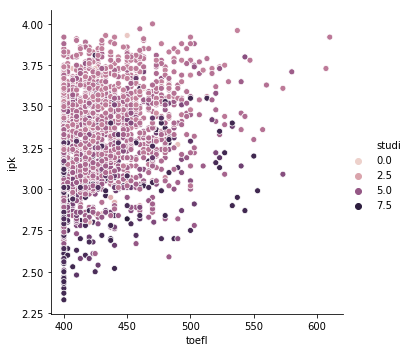

In [45]:
sns.relplot(x="toefl", y="ipk", hue="studi", data=data_v1);

In [46]:
data_v1.mean()

jenis kelamin          1.603625
ipk                    3.284208
toefl                425.035185
lama studi(tahun)      3.950335
lama studi(bulan)      6.975735
studi                  4.441368
dtype: float64

In [47]:
data_v1.toefl.min()

400.0

Pada nilai studi masih terdapat nilai studi yang < 3 tahun, oleh karena itu nilai tsb diubah terlebih dahulu menjadi 0 untuk mempermudah pengubahan nilai

In [48]:
for i in range(data_v1.shape[0]):
    if data_v1['studi'].iloc[i] < 3.0:
        print(data_v1['studi'].iloc[i])
        data_v1['studi'].iloc[i] = 0

1.8333333333333335
1.9166666666666665
2.0
1.8333333333333335
2.0
2.0
2.0
2.25
2.3333333333333335
2.4166666666666665
1.5
2.4166666666666665
2.4166666666666665
2.5
1.75
1.75
1.75
1.75
1.8333333333333335
1.8333333333333335
1.8333333333333335
1.8333333333333335
1.8333333333333335
1.8333333333333335
1.8333333333333335
2.0
2.0
2.0
2.0
2.0
2.0
1.9166666666666665
2.0
2.25
2.25
1.25
2.25
2.3333333333333335
2.4166666666666665
2.5
2.5
2.75
2.75
1.75
1.75
1.75
1.75
1.75
1.75
1.75
1.9166666666666665
1.9166666666666665
1.9166666666666665
1.9166666666666665
1.9166666666666665
1.9166666666666665
1.9166666666666665
1.9166666666666665
1.9166666666666665
1.9166666666666665
1.9166666666666665
2.0
2.0
2.25
2.25
2.25
2.25
2.25
2.25
2.25
2.3333333333333335
2.25
2.5
2.5
2.5


Mengubah nilai 0 pada studi menjadi missing value untuk mempermudah pengubahan nilai

In [49]:
data_v2 = data_v1.replace(0,np.NaN)
data_v2

,strata,jurusan,jenis kelamin,ipk,toefl,alamat,lama studi(tahun),lama studi(bulan),studi
0,S1,Matematika,1,3.13,427.0,Jalan Kembangarum RT 6 RW II Kecamatan Mrangge...,4.0,9.0,4.750000
1,S1,Matematika,2,3.03,403.0,Ds. tegalrejo RT 01/ III Kec. Wirosari Kab. Gr...,3.0,9.0,3.750000
2,S1,Matematika,2,3.13,400.0,Jalan Karang Kimpul Selatan I RT 02 RW 01 No. ...,3.0,9.0,3.750000
3,S1,Matematika,2,3.56,433.0,Ds. Semirejo RT 03 RW VIII Kec. Gembong Kab. Pati,3.0,9.0,3.750000
4,S1,Matematika,1,3.26,400.0,Ds. Bumirejo RT 06/01 Kec. Karangawen demak 59566,3.0,9.0,3.750000
5,S1,Matematika,1,2.84,417.0,Jl. Siliwangi No. 118 Desa Ciawigebang Kec. Ci...,4.0,7.0,4.583333
6,S1,Matematika,2,3.63,400.0,Perumahan Buaran Indah B 191 RT 04/ 06 Pekalon...,3.0,9.0,3.750000
7,S1,Matematika,2,3.69,427.0,Jati Kulon Gg. 1 RT 07/1 No. 49 Kudus,3.0,9.0,3.750000
8,S1,Matematika,2,3.63,413.0,Jalan Cendrawasih Gg. Kurma RT 08/2 No. 299 Wi...,3.0,8.0,3.666667
9,S1,Matematika,2,3.35,417.0,Dsn Rowopolo RT 01/ 03 Ds Rowosari Kec. Tuntan...,3.0,9.0,3.750000


In [50]:
data_v2['studi'] = data_v2['studi'].fillna(data_v2['studi'].mean())

Data kolom studi yang mempunyai nilai < 3 sudah berhasil dirubah menggunakan rata-rata studi

In [51]:
data_v2.studi.min()

3.0

In [52]:
data_v2.count()

strata               2538
jurusan              2538
jenis kelamin        2538
ipk                  2538
toefl                2538
alamat               2538
lama studi(tahun)    2537
lama studi(bulan)    2143
studi                2538
dtype: int64

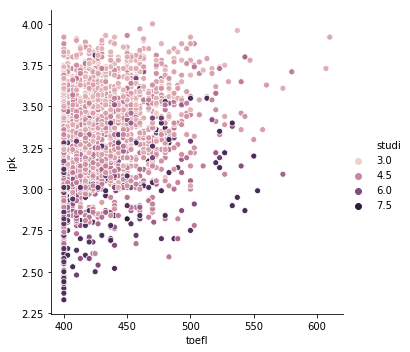

In [53]:
sns.relplot(x="toefl", y="ipk", hue="studi", data=data_v2);

In [54]:
# writer = pd.ExcelWriter('DataNew.xlsx')
# data_v3.to_excel(writer, 'Sheet1', index=False)
# writer.save()

** 3.3 Format Data **
- Melakukan tahap akhir dalam data preparation seperti mengubah tipe data, mengkategorikan data, ataupun yang berhubungan dengan persiapan data untuk diolah dalam modelling

Mapping Lama Studi :
    - Lama Studi > 3 dan <= 4 : 0 (Tepat Waktu)
    - Lama Studi > 4          : 1 (Tidak Tepat Waktu)

In [55]:
# Mengkategorikan Lama Studi
data_v2.loc[ data_v2['studi'] <= 4, 'studi'] = 0,
data_v2.loc[ data_v2['studi'] > 4, 'studi'] = 1

In [56]:
data_v2['studi'].value_counts()

1.0    1530
0.0    1008
Name: studi, dtype: int64

Melihat persentase masing-masing kategori abel data dari total data lama studi 

In [57]:
# tepat = 
# telat = 
# total = 2538

# print('Percent of Tepat: ''{0:.2f}%'.format((tepat / total * 100)))
# print('Percent of Telat: ''{0:.2f}%'.format((telat / total * 100)))
# print('Total Data: 2538')

Melihat apakah kolom 'lama studi' sudah berhasil terbuat atau belum

In [58]:
data_v2.head()

,strata,jurusan,jenis kelamin,ipk,toefl,alamat,lama studi(tahun),lama studi(bulan),studi
0,S1,Matematika,1,3.13,427.0,Jalan Kembangarum RT 6 RW II Kecamatan Mrangge...,4.0,9.0,1.0
1,S1,Matematika,2,3.03,403.0,Ds. tegalrejo RT 01/ III Kec. Wirosari Kab. Gr...,3.0,9.0,0.0
2,S1,Matematika,2,3.13,400.0,Jalan Karang Kimpul Selatan I RT 02 RW 01 No. ...,3.0,9.0,0.0
3,S1,Matematika,2,3.56,433.0,Ds. Semirejo RT 03 RW VIII Kec. Gembong Kab. Pati,3.0,9.0,0.0
4,S1,Matematika,1,3.26,400.0,Ds. Bumirejo RT 06/01 Kec. Karangawen demak 59566,3.0,9.0,0.0


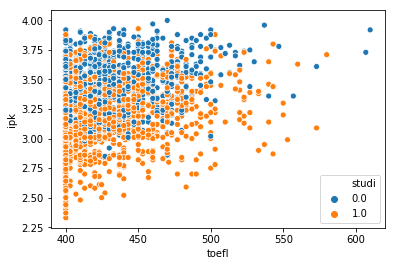

In [59]:
sns.scatterplot(x=data_v2['toefl'], y=data_v2['ipk'], hue=data_v2['studi'])

Pengelompokan IPK akan dibagi menjadi 4 kategori berdasarkan persebaran nilai IPK yang ada,
yaitu cukup, baik, sangat baik, dan istimewa

- IPK kurang dari 2,5 akan dikelompokkan sebagai IPK cukup, 
- IPK antara 2,76 sampai 3,0 akan dikelompokkan sebagai IPK baik, 
- IPK antara 3.1 sampai 3.5 akan dikelompokkan sebagai IPK sangat baik,
- IPK lebih dari 3,50 akan dikelompokkan sebagai IPK istimewa.

Mapping IPK :
    - IPK <= 2.5 : 0
    - IPK > 2.5 dan <= 3.0 : 1
    - IPK > 3.0 dan <= 3.5 : 2
    - IPK > 3.5 dan <= 4.0 : 3

In [60]:
data_v2['ipk'].describe()

count    2538.000000
mean        3.284208
std         0.289939
min         2.330000
25%         3.070000
50%         3.290000
75%         3.510000
max         4.000000
Name: ipk, dtype: float64

In [61]:
## Mengkategorikan IPK 
data_v2.loc[ data_v2['ipk'] <= 2.5, 'ipk'] = 0,
data_v2.loc[(data_v2['ipk'] > 2.5)& (data_v2['ipk'] <=3.0), 'ipk'] = 1,
data_v2.loc[(data_v2['ipk'] > 3.0)& (data_v2['ipk'] <=3.5), 'ipk'] = 2,
data_v2.loc[ data_v2['ipk'] > 3.5, 'ipk'] = 3

Dalam penelitian yang berjudul “Reading-Writing
Relationship in First and Second Language”, Carson dkk
mengelompokkan nilai TOEFL menjadi 4 kelas, yaitu
dasar, menengah bawah, menengah atas, dan mahir. 


    - TOEFL < 420        = kelas dasar 
    - TOEFL > 421 <= 480 = kelas menengah bawah
    - TOEFL > 481 <= 520 = kelas menengah atas
    - TOEFL > 520        = kelas mahir

Mapping TOEFL :
    - TOEFL <= 420           : 0
    - TOEFL > 420 dan <= 480 : 1
    - TOEFL > 480 dan <= 520 : 2
    - TOEFL > 520            : 3

In [62]:
data_v2['toefl'].describe()

count    2538.000000
mean      425.035185
std        30.729711
min       400.000000
25%       400.000000
50%       413.000000
75%       440.000000
max       610.000000
Name: toefl, dtype: float64

In [63]:
# Mengkategorikan TOEFL
data_v2.loc[ data_v2['toefl'] <= 420, 'toefl'] = 0,
data_v2.loc[(data_v2['toefl'] > 420)& (data_v2['toefl'] <=480), 'toefl'] = 1,
data_v2.loc[(data_v2['toefl'] > 480)& (data_v2['toefl'] <=520), 'toefl'] = 2,
data_v2.loc[data_v2['toefl'] > 520, 'toefl'] = 3

In [64]:
data_v2 = data_v2.drop(['lama studi(tahun)','lama studi(bulan)'], axis=1)

In [65]:
data_v2.head(10)

,strata,jurusan,jenis kelamin,ipk,toefl,alamat,studi
0,S1,Matematika,1,2.0,1.0,Jalan Kembangarum RT 6 RW II Kecamatan Mrangge...,1.0
1,S1,Matematika,2,2.0,0.0,Ds. tegalrejo RT 01/ III Kec. Wirosari Kab. Gr...,0.0
2,S1,Matematika,2,2.0,0.0,Jalan Karang Kimpul Selatan I RT 02 RW 01 No. ...,0.0
3,S1,Matematika,2,3.0,1.0,Ds. Semirejo RT 03 RW VIII Kec. Gembong Kab. Pati,0.0
4,S1,Matematika,1,2.0,0.0,Ds. Bumirejo RT 06/01 Kec. Karangawen demak 59566,0.0
5,S1,Matematika,1,1.0,0.0,Jl. Siliwangi No. 118 Desa Ciawigebang Kec. Ci...,1.0
6,S1,Matematika,2,3.0,0.0,Perumahan Buaran Indah B 191 RT 04/ 06 Pekalon...,0.0
7,S1,Matematika,2,3.0,1.0,Jati Kulon Gg. 1 RT 07/1 No. 49 Kudus,0.0
8,S1,Matematika,2,3.0,0.0,Jalan Cendrawasih Gg. Kurma RT 08/2 No. 299 Wi...,0.0
9,S1,Matematika,2,2.0,0.0,Dsn Rowopolo RT 01/ 03 Ds Rowosari Kec. Tuntan...,0.0


In [66]:
## Mengekstrak tanggal lulus untuk mengetahui tahun lulus
# data_v1['tahun lulus'] = pd.DatetimeIndex(data_v1['tgl lulus']).year
# data_v1.head()

Mengkategorikan asal dari tiap wisudawan dengan kategori 'semarang' dan 'luar semarang'
    
    - Luar Semarang : 0
    - Semarang      : 1

In [67]:
data_v2['asal'] = data_v2['alamat'].str.contains('semarang', case=False, na=False).astype(int)

In [68]:
data_v2.head()

,strata,jurusan,jenis kelamin,ipk,toefl,alamat,studi,asal
0,S1,Matematika,1,2.0,1.0,Jalan Kembangarum RT 6 RW II Kecamatan Mrangge...,1.0,0
1,S1,Matematika,2,2.0,0.0,Ds. tegalrejo RT 01/ III Kec. Wirosari Kab. Gr...,0.0,0
2,S1,Matematika,2,2.0,0.0,Jalan Karang Kimpul Selatan I RT 02 RW 01 No. ...,0.0,1
3,S1,Matematika,2,3.0,1.0,Ds. Semirejo RT 03 RW VIII Kec. Gembong Kab. Pati,0.0,0
4,S1,Matematika,1,2.0,0.0,Ds. Bumirejo RT 06/01 Kec. Karangawen demak 59566,0.0,0


Mapping Jenis Kelamin :
    - Laki-laki : 0
    - Perempuan : 1

In [69]:
# Mengkategorikan Jenis Kelamin
data_v2.loc[data_v2['jenis kelamin'] == 1, 'jenis kelamin'] = 0,
data_v2.loc[data_v2['jenis kelamin'] == 2, 'jenis kelamin'] = 1

In [70]:
data_v2.head()

,strata,jurusan,jenis kelamin,ipk,toefl,alamat,studi,asal
0,S1,Matematika,0,2.0,1.0,Jalan Kembangarum RT 6 RW II Kecamatan Mrangge...,1.0,0
1,S1,Matematika,1,2.0,0.0,Ds. tegalrejo RT 01/ III Kec. Wirosari Kab. Gr...,0.0,0
2,S1,Matematika,1,2.0,0.0,Jalan Karang Kimpul Selatan I RT 02 RW 01 No. ...,0.0,1
3,S1,Matematika,1,3.0,1.0,Ds. Semirejo RT 03 RW VIII Kec. Gembong Kab. Pati,0.0,0
4,S1,Matematika,0,2.0,0.0,Ds. Bumirejo RT 06/01 Kec. Karangawen demak 59566,0.0,0


Menghilangkan kolom data yang sudah diolah sedemikian rupa, hingga hanya menghasilkan beberapa kolom data

In [71]:
data_v2 = data_v2.drop(['strata','alamat'], axis=1)

In [72]:
data_v2.head()

,jurusan,jenis kelamin,ipk,toefl,studi,asal
0,Matematika,0,2.0,1.0,1.0,0
1,Matematika,1,2.0,0.0,0.0,0
2,Matematika,1,2.0,0.0,0.0,1
3,Matematika,1,3.0,1.0,0.0,0
4,Matematika,0,2.0,0.0,0.0,0


Mengubah header kolom agar dalam pengolahan menjadi lebih mudah dipahami

In [73]:
# data_v1.rename(index=str, columns={"nmpstmspst":"jurusan", "nlipktrlsm":"ipk",
#                                      "toefltrlsm":"toefl","kdjektrlsm":"jenis kelamin"}, inplace=True)
# data_v1.head()

Mapping Jurusan :
    - Kimia Murni   : 0
    - Matematika    : 1
    - Fisika        : 2
    - Statistika    : 3
    - Ilmu Komputer : 4
    - Biologi       : 5

In [74]:
jurusan_mapping = {"Kimia Murni": 0, "Matematika":1, "Fisika":2, "Statistika":3, "Ilmu Komputer":4, "Biologi":5}
data_v2['jurusan'] = data_v1['jurusan'].map(jurusan_mapping)

In [75]:
# # Mengkategorikan Angkatan
# data_v1.loc[data_v1['tahun masuk'] == 2005, 'tahun masuk'] = 0
# data_v1.loc[data_v1['tahun masuk'] == 2006, 'tahun masuk'] = 1
# data_v1.loc[data_v1['tahun masuk'] == 2007, 'tahun masuk'] = 2
# data_v1.loc[data_v1['tahun masuk'] == 2008, 'tahun masuk'] = 3
# data_v1.loc[data_v1['tahun masuk'] == 2009, 'tahun masuk'] = 4
# data_v1.loc[data_v1['tahun masuk'] == 2010, 'tahun masuk'] = 5
# data_v1.loc[data_v1['tahun masuk'] == 2011, 'tahun masuk'] = 6
# data_v1.loc[data_v1['tahun masuk'] == 2012, 'tahun masuk'] = 7
# data_v1.loc[data_v1['tahun masuk'] == 2013, 'tahun masuk'] = 8

Merubah urutan header dengan urutan header pertama adalah 'lama studi' agar dalam tahap modelling dan deployment lebih mudah mengolahnya

In [76]:
data_v2.head()

,jurusan,jenis kelamin,ipk,toefl,studi,asal
0,1,0,2.0,1.0,1.0,0
1,1,1,2.0,0.0,0.0,0
2,1,1,2.0,0.0,0.0,1
3,1,1,3.0,1.0,0.0,0
4,1,0,2.0,0.0,0.0,0


In [77]:
data_final = data_v2[['jurusan', 'jenis kelamin', 'asal', 'ipk', 'toefl', 'studi']]

In [78]:
data_diskrit = data_v2[['jurusan', 'jenis kelamin', 'asal', 'ipk', 'toefl', 'studi']]

In [79]:
# Mengkategorikan toefl
data_diskrit.loc[data_diskrit['toefl'] == 0, 'toefl'] = 'elementary'
data_diskrit.loc[data_diskrit['toefl'] == 1, 'toefl'] = 'low'
data_diskrit.loc[data_diskrit['toefl'] == 2, 'toefl'] = 'high'
data_diskrit.loc[data_diskrit['toefl'] == 3, 'toefl'] = 'advance'

In [80]:
# Mengkategorikan IPK
data_diskrit.loc[data_diskrit['ipk'] == 0, 'ipk'] = 'cukup'
data_diskrit.loc[data_diskrit['ipk'] == 1, 'ipk'] = 'baik'
data_diskrit.loc[data_diskrit['ipk'] == 2, 'ipk'] = 'sangat_baik'
data_diskrit.loc[data_diskrit['ipk'] == 3, 'ipk'] = 'istimewa'

In [81]:
# Mengkategorikan Jurusan
data_diskrit.loc[data_diskrit['jurusan'] == 0, 'jurusan'] = 'kim'
data_diskrit.loc[data_diskrit['jurusan'] == 1, 'jurusan'] = 'mat'
data_diskrit.loc[data_diskrit['jurusan'] == 2, 'jurusan'] = 'fis'
data_diskrit.loc[data_diskrit['jurusan'] == 3, 'jurusan'] = 'stat'
data_diskrit.loc[data_diskrit['jurusan'] == 4, 'jurusan'] = 'if'
data_diskrit.loc[data_diskrit['jurusan'] == 5, 'jurusan'] = 'bio'

In [82]:
# Mengkategorikan jenis kelamin
data_diskrit.loc[data_diskrit['jenis kelamin'] == 0, 'jenis kelamin'] = 'L',
data_diskrit.loc[data_diskrit['jenis kelamin'] == 1, 'jenis kelamin'] = 'P'

In [83]:
# Mengkategorikan asal
data_diskrit.loc[data_diskrit['asal'] == 0, 'asal'] = 'luar'
data_diskrit.loc[data_diskrit['asal'] == 1, 'asal'] = 'smg'

In [84]:
# Mengkategorikan asal
data_diskrit.loc[data_diskrit['studi'] == 0, 'studi'] = 'tepat'
data_diskrit.loc[data_diskrit['studi'] == 1, 'studi'] = 'telat'

In [85]:
# from math import log

# def entropy(*probs):
#   """Calculate information entropy"""
#   try:
#     total = sum(probs)
#     return sum([-p / total * log(p / total, 2) for p in probs])
#   except:
#     return 0

In [86]:
# entropy(1026, 785)

0.9871875905419161

In [87]:
# data_diskrit.loc[data_diskrit['ipk'] == "istimewa"]

In [88]:
data_diskrit.head()

,jurusan,jenis kelamin,asal,ipk,toefl,studi
0,mat,L,luar,sangat_baik,low,telat
1,mat,P,luar,sangat_baik,elementary,tepat
2,mat,P,smg,sangat_baik,elementary,tepat
3,mat,P,luar,istimewa,low,tepat
4,mat,L,luar,sangat_baik,elementary,tepat


In [89]:
data_diskrit.groupby(["ipk", "asal"]).size().reset_index(name="studi")

,ipk,asal,studi
0,baik,luar,308
1,baik,smg,88
2,cukup,luar,9
3,cukup,smg,2
4,istimewa,luar,544
5,istimewa,smg,119
6,sangat_baik,luar,1201
7,sangat_baik,smg,267


In [90]:
studi_tepat = pd.crosstab(index=data_diskrit["studi"], 
                           columns=data_diskrit["jurusan"])

studi_tepat.index= ["telat","tepat"]

studi_tepat

jurusan,bio,fis,if,kim,mat,stat
telat,232,219,356,279,252,192
tepat,149,150,60,213,212,224


In [91]:
# #menyimpan dalam file excel
# writer = pd.ExcelWriter('DataDiskrit.xlsx')
# data_diskrit.to_excel(writer, 'Sheet1', index=False)
# writer.save()

In [92]:
data_final.head()

,jurusan,jenis kelamin,asal,ipk,toefl,studi
0,1,0,0,2.0,1.0,1.0
1,1,1,0,2.0,0.0,0.0
2,1,1,1,2.0,0.0,0.0
3,1,1,0,3.0,1.0,0.0
4,1,0,0,2.0,0.0,0.0


In [93]:
data_diskrit.to_csv('datadiskrit.csv', header=True, index=False)

In [94]:
data_final.to_csv('datafix.csv', header=True, index=False)

## 4. Modelling 
Modelling adalah pemilihan teknik data mining, algoritma dan menetukan parameter dengan nilai yang optimal. Pada tahapan pemodelan, ada beberapa hal yang dilakukan antara lain, memilih teknik pemodelan, membangun model, dan menilai model 

** 4.1 Select Modelling Technique **
- Algoritma yang digunakan algoritma ID3. ID3 dipilih karena menghasilkan pohon keputusan yang mudah dipahami berdasarkan kategori-kategori, sehingga lebih mudah dalam menganalisis masa studi yaitu tepat waktu/tidak tepat waktu

** 4.2 Build Model **

In [95]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import graphviz

# split_data = train_test_split(data_final, test_size=.30)

# train_data = split_data[0]
# test_data = split_data[1]

# studi_train = train_data.studi.tolist()
# studi_test = test_data.studi.tolist()

# train_data_remove = train_data.drop(columns = "studi")
# test_data_remove = test_data.drop(columns = "studi")

# # ID3
# clf = tree.DecisionTreeClassifier(criterion = "entropy", max_depth=2, random_state=0)
# clf.fit(train_data_remove, studi_train)

In [96]:
features = list(data_final.columns[:5])
features

['jurusan', 'jenis kelamin', 'asal', 'ipk', 'toefl']

In [97]:
y = data_final["studi"]
X = data_final[features]
clf = tree.DecisionTreeClassifier(criterion = "entropy", max_depth=3, random_state=0)
clf = clf.fit(X,y)

In [7]:
# from IPython.display import Image  
# from sklearn.externals.six import StringIO  
# import pydotplus

# dot_data = StringIO()  
# tree.export_graphviz(clf, out_file=dot_data,  
#                          feature_names=features, filled=True, rounded=True)  
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())  

In [103]:
data_final.head()

,jurusan,jenis kelamin,asal,ipk,toefl,studi
0,1,0,0,2.0,1.0,1.0
1,1,1,0,2.0,0.0,0.0
2,1,1,1,2.0,0.0,0.0
3,1,1,0,3.0,1.0,0.0
4,1,0,0,2.0,0.0,0.0


In [104]:
X = data_final.drop(['studi'], axis=1)

In [105]:
Y = data_final['studi']

In [106]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.40, random_state=40)

# 5. Evaluation

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.externals.six import StringIO 
import pydotplus

In [108]:
# ID3
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3) 

In [109]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [110]:
y_pred = clf.predict(x_test)

In [111]:
metrics.accuracy_score(y_test, y_pred)

0.7047244094488189

In [112]:
metrics.precision_score(y_test, y_pred)

0.6762342135476463

In [113]:
metrics.recall_score(y_test, y_pred)

0.9703459637561779

In [114]:
metrics.confusion_matrix(y_test, y_pred)

array([[127, 282],
       [ 18, 589]], dtype=int64)

In [115]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(127, 282, 18, 589)

In [116]:
# Akurasi
(tp + tn) / (tp + tn + fp + fn)

0.7047244094488189

In [117]:
tp / (tp + fn)

0.9703459637561779

In [118]:
tn / (tn + fp)

0.3105134474327628

In [119]:
# data_final.to_csv('datafix.csv', header=False, index=False)

In [120]:
y_pred

array([1., 1., 0., ..., 0., 1., 1.])

## 6. Deployment 

Setelah didapatkan hasil pemodelan menggunakan algoritma ID3, langkah selanjutnya adalah tahapan deployment yang berfungsi menginformasikan hasil kepada stakeholder yang dituju.

Sehingga dengan adanya penelitian ini, civitasi akademika FSM Undip dapat mengetahui faktor apa saja yang mempengaruhi masa studi.

## deploy to the Web